# Log returns of Eurostoxx dataset

Data from R package *tailDepFun*.

In [6]:
library(tailDepFun)
library(maxstablePCA)
library(dplyr)
library(tibble)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data(dataEUROSTOXX)

# Reduce to the 5 individual german/french stocks from chemistry and insurance

$\rightarrow$ there should be tail dependence because they are listed in the same index and are from related industries.

In [9]:
individual_log_returns_stocks <- dataEUROSTOXX[, 6:10] %>% as_tibble()
head(individual_log_returns_stocks)

Bayer,BASF,Allianz,AXA,Airliquide
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.4424087,-0.4631496,0.5854389,7.2271676,5.1916160
4.1477660,-0.9260177,0.4904976,3.9306886,-0.6558221
-5.3249609,-4.2895292,-1.5853991,-0.2667199,-1.8133194
0.8305381,0.7749246,3.0839719,7.7565315,-1.7182571
7.6269167,4.7862377,2.0740177,-0.3354380,0.4425691
1.8964883,4.2949449,-0.8625664,-3.0626649,-0.8831881


In [10]:
summary(individual_log_returns_stocks)

     Bayer               BASF             Allianz               AXA          
 Min.   :-31.0923   Min.   :-20.9809   Min.   :-33.53672   Min.   :-24.4266  
 1st Qu.: -2.8660   1st Qu.: -2.5642   1st Qu.: -2.57777   1st Qu.: -3.0478  
 Median : -0.2339   Median : -0.4473   Median : -0.24783   Median : -0.3707  
 Mean   : -0.2013   Mean   : -0.2199   Mean   :  0.00626   Mean   : -0.1831  
 3rd Qu.:  2.1645   3rd Qu.:  2.0486   3rd Qu.:  2.42108   3rd Qu.:  2.8364  
 Max.   : 26.5477   Max.   : 26.3731   Max.   : 33.39844   Max.   : 36.3055  
   Airliquide      
 Min.   :-11.7318  
 1st Qu.: -2.1033  
 Median : -0.3840  
 Mean   : -0.2601  
 3rd Qu.:  1.3586  
 Max.   : 13.9214  

In [26]:
log_returns_stocks_trafo <- transform_unitfrechet(individual_log_returns_stocks) %>% as_tibble()
log_returns_stocks_trafo_seriesplot <- log_returns_stocks_trafo
log_returns_stocks_trafo_seriesplot$index <- 1:dim(log_returns_stocks_trafo)[1]

# Time series plots of transformed data

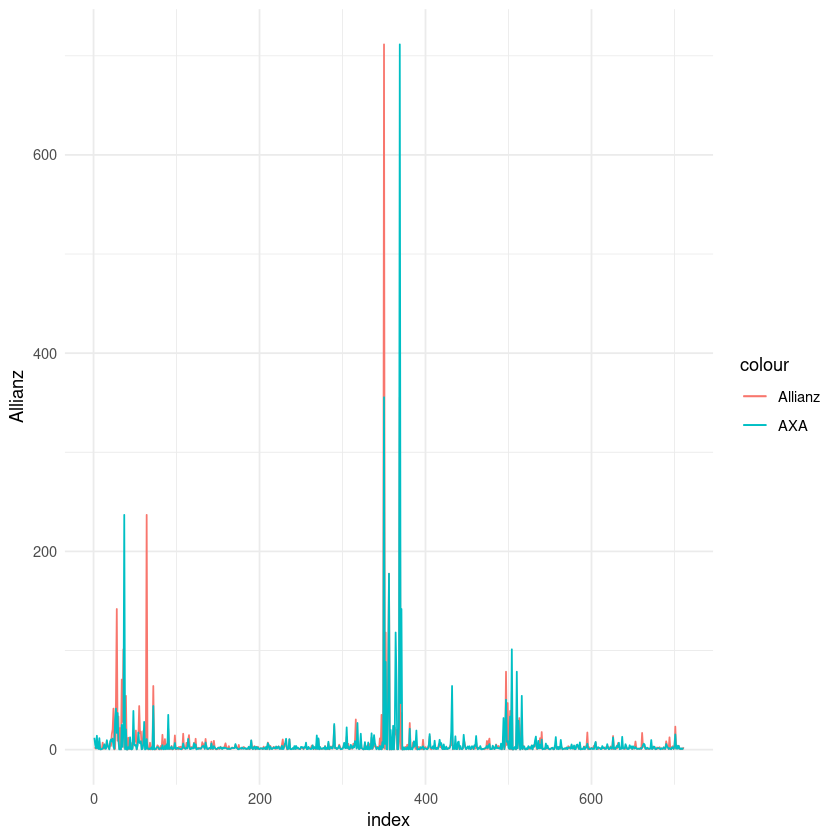

In [29]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = Allianz, color = "Allianz")) + 
geom_line() +
geom_line(aes(x = index, y = AXA, color = "AXA")) +
theme_minimal()

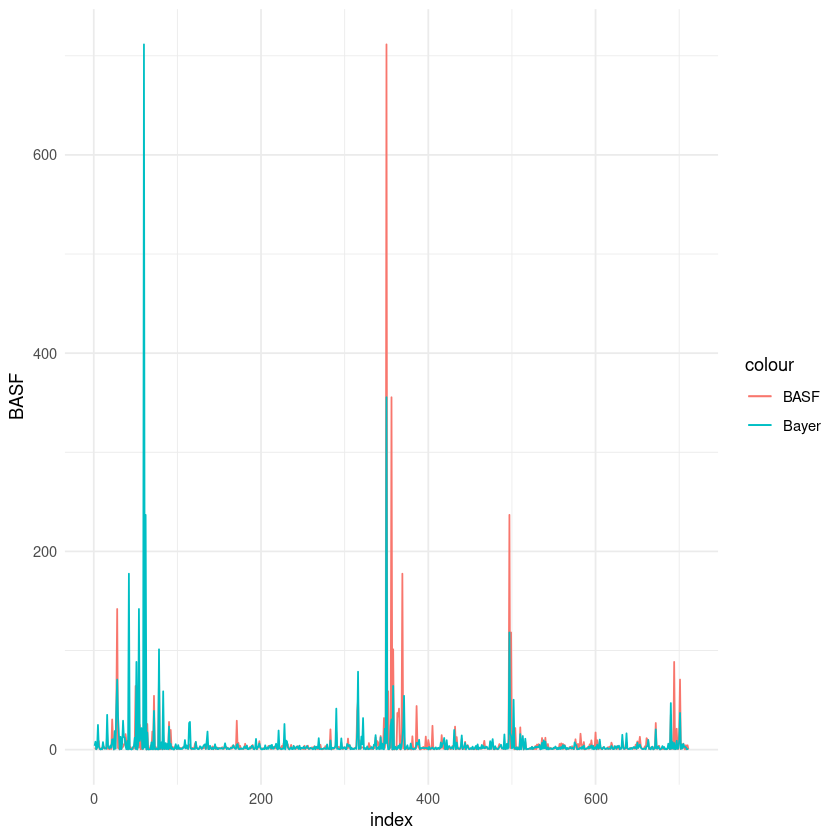

In [30]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = BASF, color = "BASF")) + 
geom_line() +
geom_line(aes(x = index, y = Bayer, color = "Bayer")) +
theme_minimal()

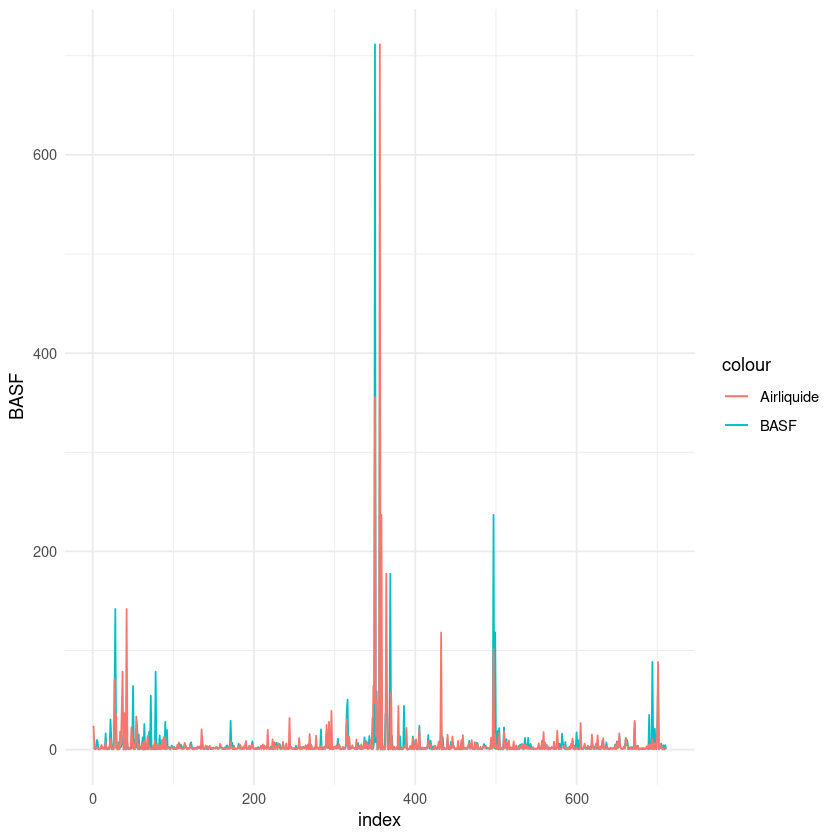

In [31]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = BASF, color = "BASF")) + 
geom_line() +
geom_line(aes(x = index, y = Airliquide, color = "Airliquide")) +
theme_minimal()

# Marginplots for two stocks

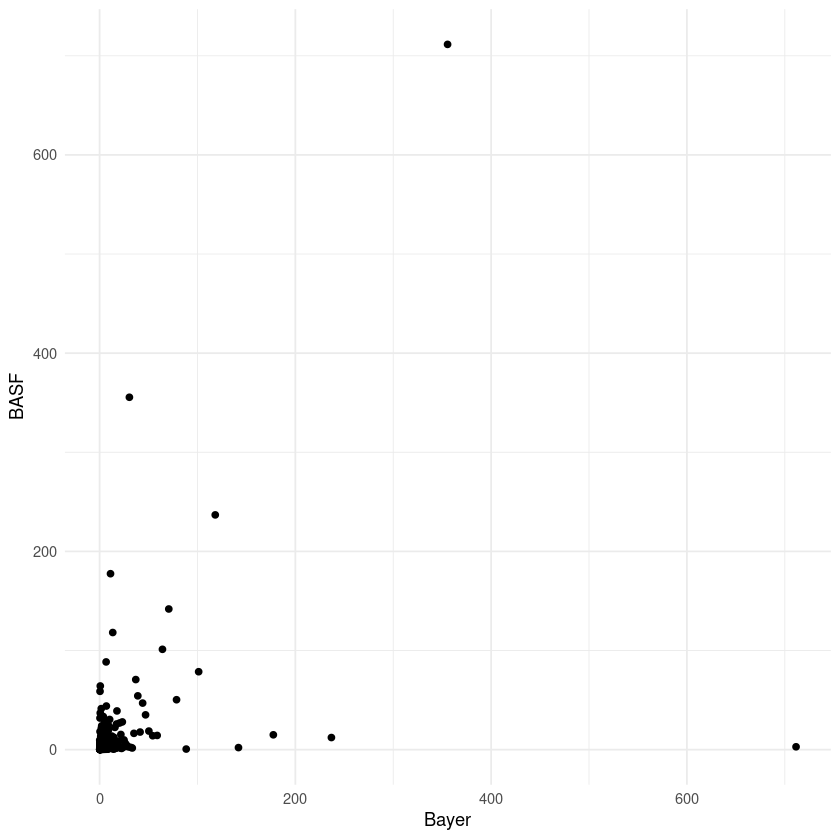

In [14]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = BASF)) + 
geom_point() +
theme_minimal()

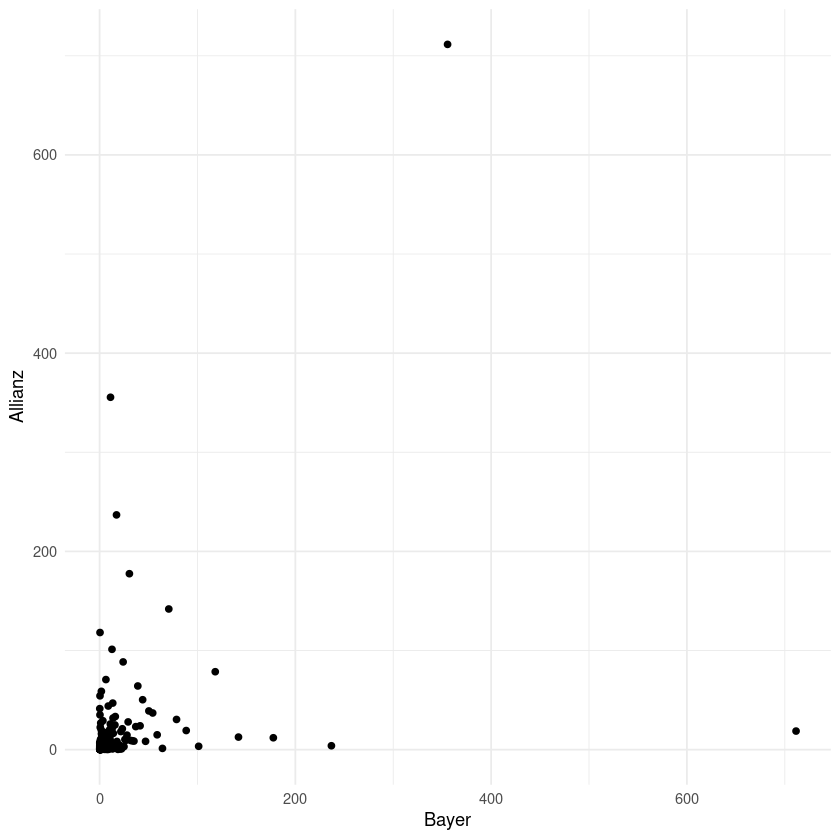

In [15]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = Allianz)) + 
geom_point() +
theme_minimal()

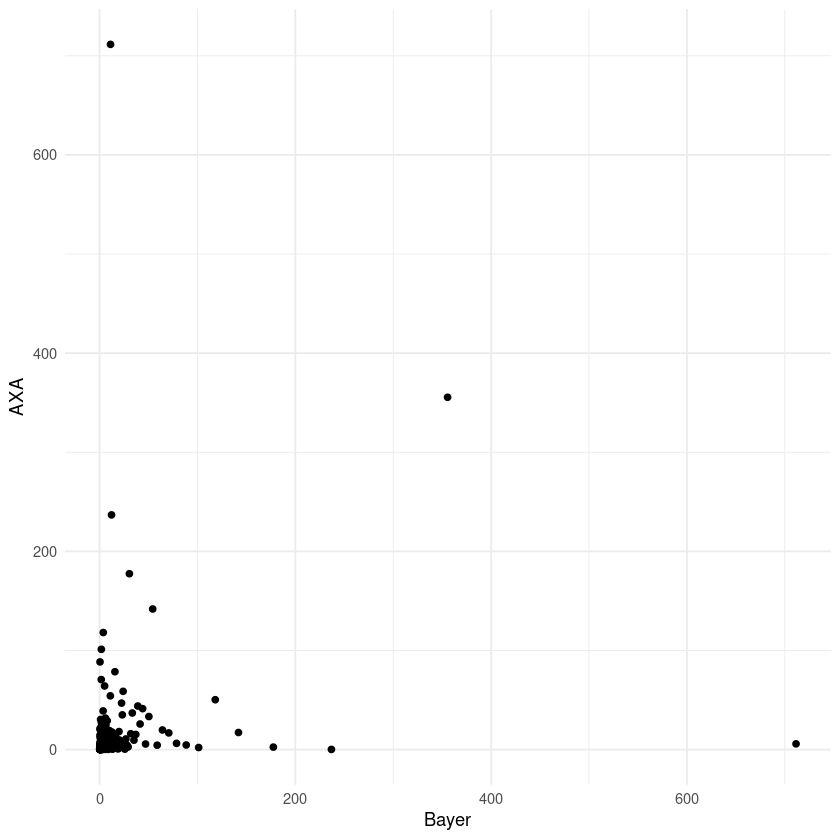

In [16]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = AXA)) + 
geom_point() +
theme_minimal()

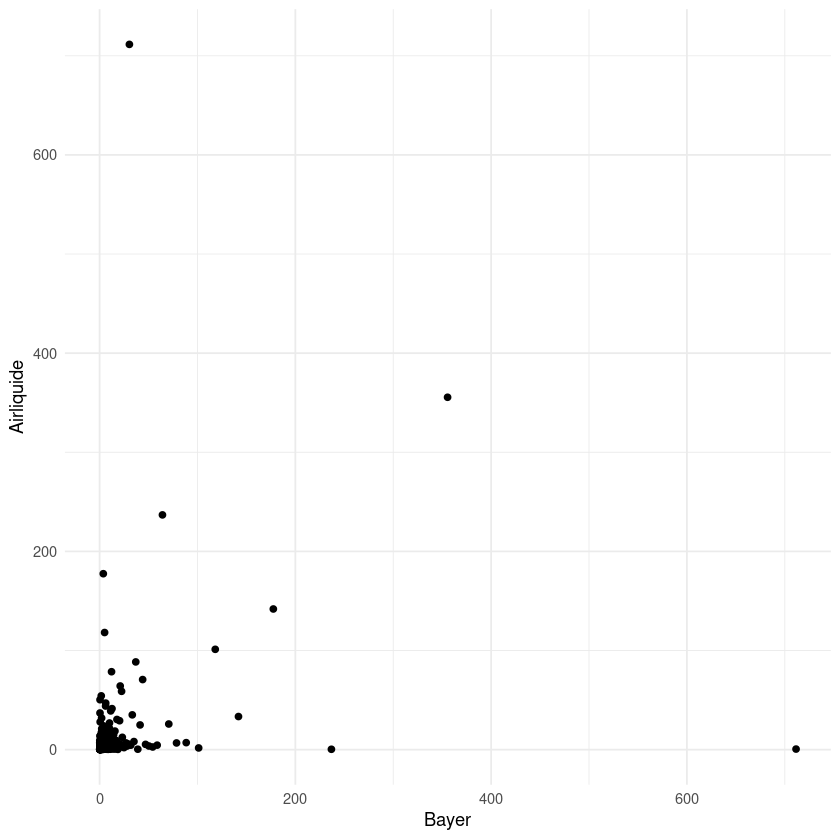

In [17]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = Airliquide)) + 
geom_point() +
theme_minimal()

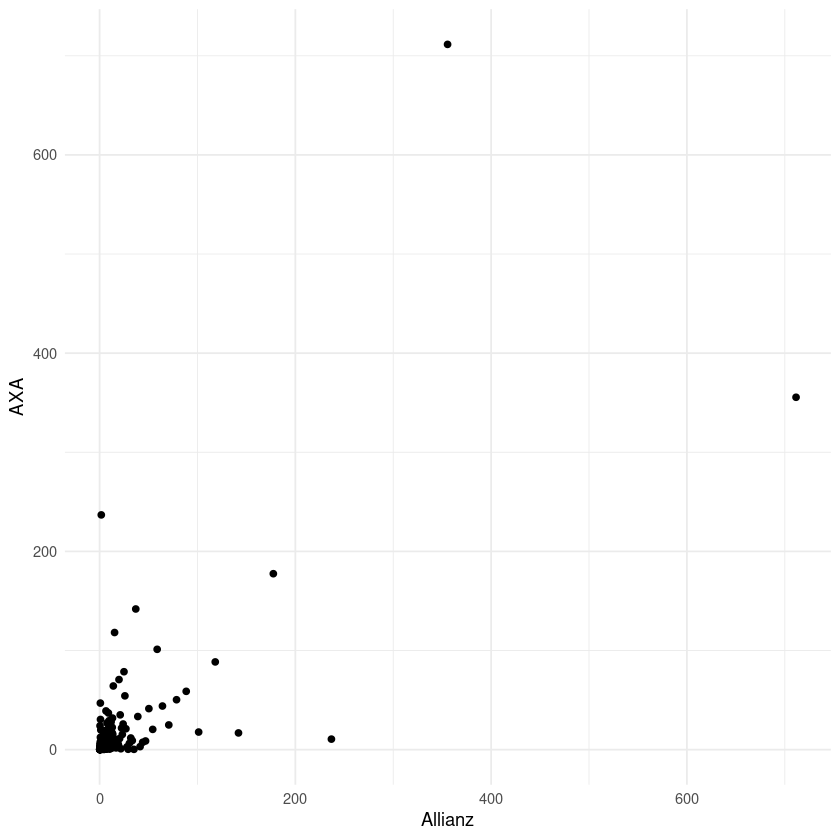

In [23]:
ggplot(log_returns_stocks_trafo, aes(x = Allianz, y = AXA)) + 
geom_point() +
theme_minimal()

# Fit PCA's to the data

In [18]:
maxPCA2 <- max_stable_prcomp(log_returns_stocks_trafo, p = 2, n_initial_guesses = 500)
maxPCA3 <- max_stable_prcomp(log_returns_stocks_trafo, p = 3, n_initial_guesses = 500)
maxPCA4 <- max_stable_prcomp(log_returns_stocks_trafo, p = 4, n_initial_guesses = 500)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [19]:
maxPCA2

$p
[1] 2

$d
[1] 5

$decoder_matrix
             [,1]       [,2]
[1,] 0.8127842415 0.00006595
[2,] 0.0418750398 0.42716032
[3,] 0.0039468445 0.85551321
[4,] 0.0009660322 0.42745372
[5,] 0.0024042431 0.15600125

$encoder_matrix
          [,1]       [,2]       [,3]        [,4]       [,5]
[1,] 1.2303388 0.01192556 0.00461003 0.006751942 0.01470930
[2,] 0.0171102 0.45811451 1.16888519 0.049874032 0.09611985

$reconstr_matrix
            [,1]        [,2]        [,3]        [,4]       [,5]
[1,] 1.000000001 0.009692911 0.003746959 0.005487872 0.01195549
[2,] 0.051520487 0.195688342 0.499301369 0.021304208 0.04105859
[3,] 0.014637999 0.391923018 0.999996721 0.042667894 0.08223181
[4,] 0.007313817 0.195822754 0.499644324 0.021318841 0.04108679
[5,] 0.002958034 0.071466435 0.182347546 0.007780411 0.01499482

$loss_fctn_value
[1] 2.428944

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [20]:
maxPCA3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]         [,2]         [,3]
[1,] 0.9564446223 0.0022594603 0.0003747234
[2,] 0.0127159277 0.3438153738 0.4133634458
[3,] 0.0051127536 0.6905696626 0.0009155022
[4,] 0.0009264617 0.0309716281 0.4811573969
[5,] 0.0002650708 0.0003906551 0.9672446573

$encoder_matrix
             [,1]        [,2]         [,3]         [,4]        [,5]
[1,] 1.0455394414 0.002277535 0.0011123796 0.0019852025 0.002715590
[2,] 0.0011272768 0.001096907 1.4480794814 0.0032999589 0.003621543
[3,] 0.0001811519 0.001530352 0.0009411563 0.0001062885 1.033864627

$reconstr_matrix
             [,1]         [,2]         [,3]         [,4]        [,5]
[1,] 1.0000005762 0.0021783366 0.0032718781 0.0018987363 0.002597312
[2,] 0.0132950040 0.0006325916 0.4978719882 0.0011345766 0.427361845
[3,] 0.0053455855 0.0007574906 0.9999997589 0.0022788515 0.002500927
[4,] 0.0009686523 0.0007363403 0.0448493792 0.0001022051 0.497451613
[5,] 0.0002771420 0.0014802249 0.0009103284 0.00

In [21]:
maxPCA4

$p
[1] 4

$d
[1] 5

$decoder_matrix
             [,1]        [,2]        [,3]         [,4]
[1,] 0.5022783648 0.002523299 0.005436661 0.0040709227
[2,] 0.0006132097 0.006367049 0.020441926 0.7374568809
[3,] 0.0062667297 0.950707998 0.004224638 0.0068597761
[4,] 0.0041211130 0.112965629 0.274869885 0.0087071690
[5,] 0.0001958023 0.000459766 1.101725446 0.0009788387

$encoder_matrix
            [,1]        [,2]         [,3]         [,4]        [,5]
[1,] 1.990929190 0.007138715 0.0045606250 0.0037486850 0.003268627
[2,] 0.011594938 0.008295036 1.0518475259 0.0059466651 0.002988932
[3,] 0.000409879 0.002179247 0.0004746495 0.0004906506 0.907668820
[4,] 0.004327895 1.356017596 0.0036413476 0.0017783243 0.003424558

$reconstr_matrix
             [,1]        [,2]         [,3]         [,4]        [,5]
[1,] 1.0000006578 0.005520243 0.0026541253 0.0018828834 0.004934688
[2,] 0.0031916358 1.000004507 0.0066971648 0.0013114375 0.018554499
[3,] 0.0124766151 0.009301977 0.9999998558 0.0056535421 0.00

# Visual assessment

In [35]:
rec2 <- reconstruct(maxPCA2, compress(maxPCA2, log_returns_stocks_trafo)) %>% as_tibble()
rec4 <- reconstruct(maxPCA4, compress(maxPCA4, log_returns_stocks_trafo)) %>% as_tibble()

names(rec2) <- names(log_returns_stocks_trafo)
names(rec4) <- names(log_returns_stocks_trafo)

rec2$index <- 1:dim(rec2)[1]
rec4$index <- 1:dim(rec4)[1]

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


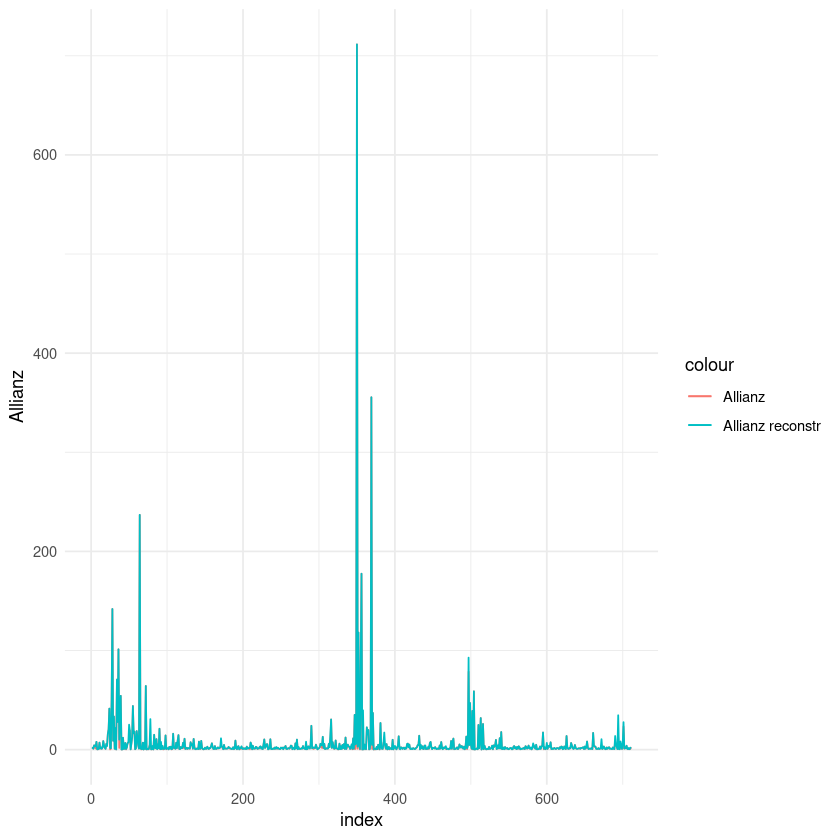

In [38]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = Allianz, color = "Allianz")) + 
geom_line() +
geom_line(aes(x = index, y = Allianz, color = "Allianz reconstr"), data = rec2) +
theme_minimal()

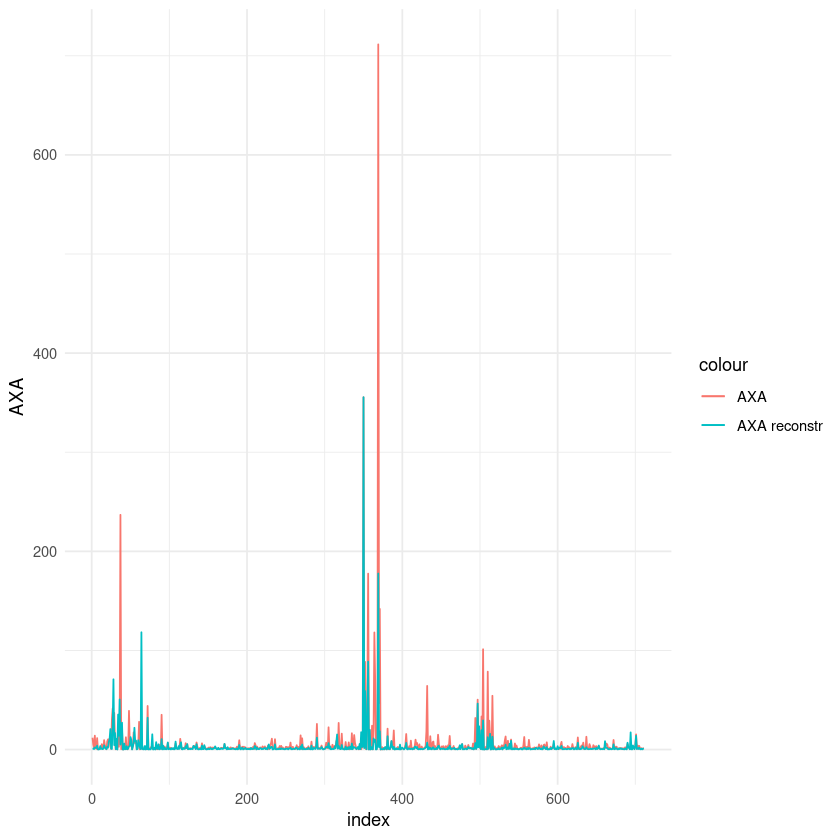

In [37]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = AXA, color = "AXA")) + 
geom_line() +
geom_line(aes(x = index, y = AXA, color = "AXA reconstr"), data = rec2) +
theme_minimal()

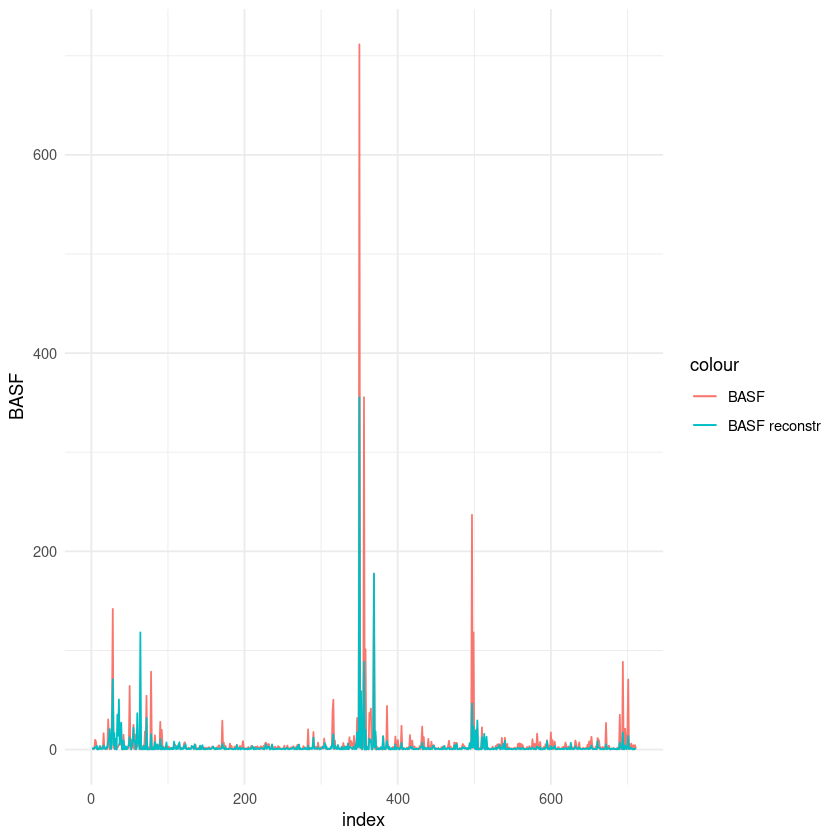

In [39]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = BASF, color = "BASF")) + 
geom_line() +
geom_line(aes(x = index, y = BASF, color = "BASF reconstr"), data = rec2) +
theme_minimal()

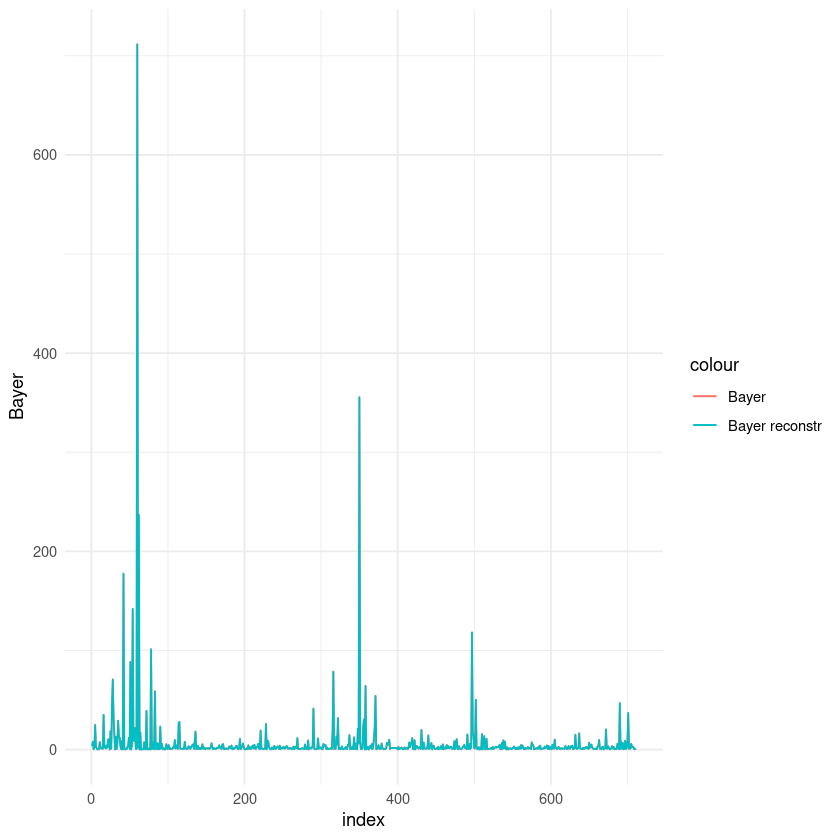

In [44]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = Bayer, color = "Bayer")) + 
geom_line() +
geom_line(aes(x = index, y = Bayer, color = "Bayer reconstr"), data = rec2) +
theme_minimal()

# Now with p = 4

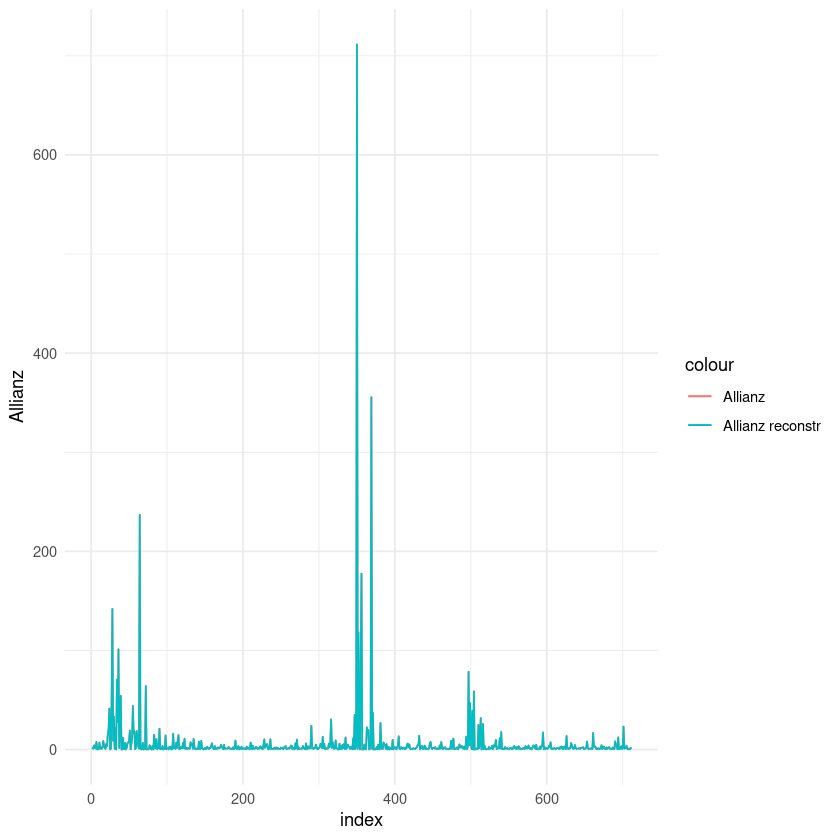

In [41]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = Allianz, color = "Allianz")) + 
geom_line() +
geom_line(aes(x = index, y = Allianz, color = "Allianz reconstr"), data = rec4) +
theme_minimal()

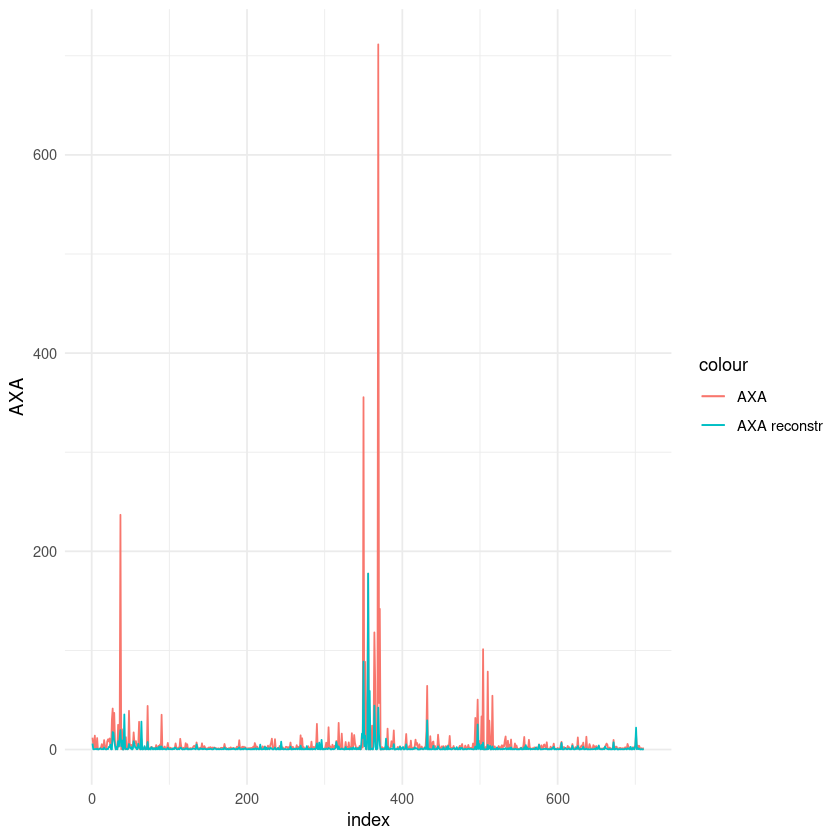

In [42]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = AXA, color = "AXA")) + 
geom_line() +
geom_line(aes(x = index, y = AXA, color = "AXA reconstr"), data = rec4) +
theme_minimal()

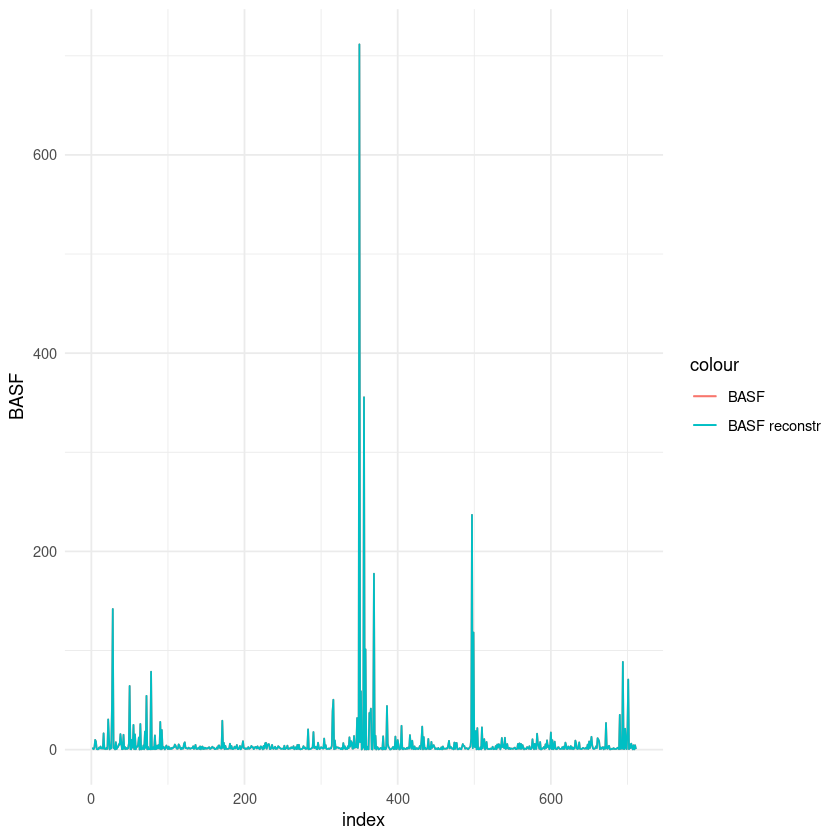

In [43]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = BASF, color = "BASF")) + 
geom_line() +
geom_line(aes(x = index, y = BASF, color = "BASF reconstr"), data = rec4) +
theme_minimal()

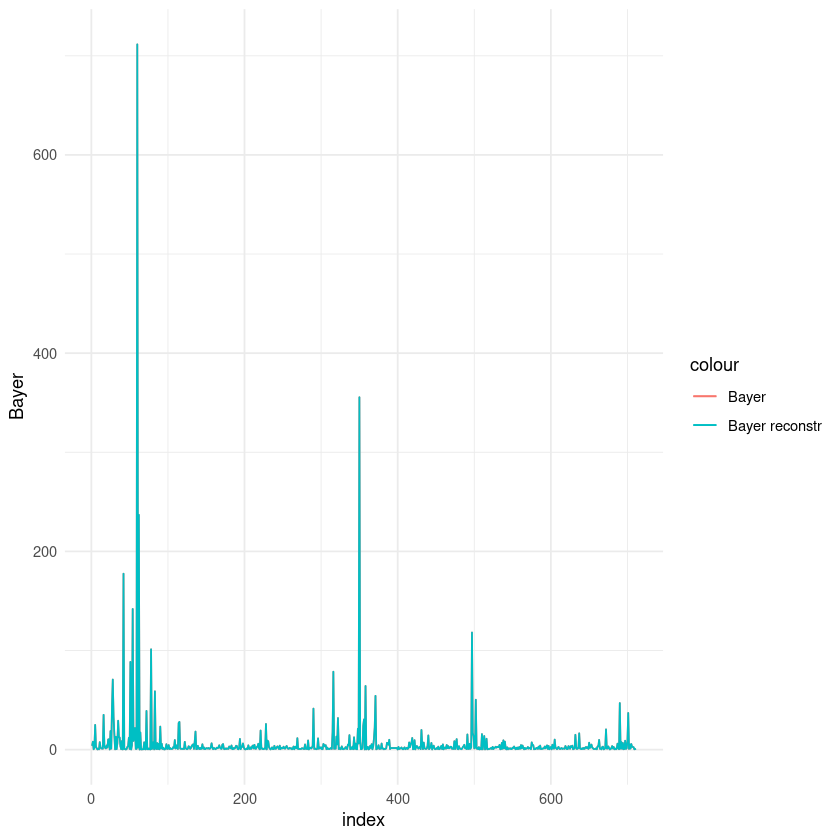

In [45]:
ggplot(log_returns_stocks_trafo_seriesplot, aes(x = index, y = Bayer, color = "Bayer")) + 
geom_line() +
geom_line(aes(x = index, y = Bayer, color = "Bayer reconstr"), data = rec4) +
theme_minimal()

# Marginplots

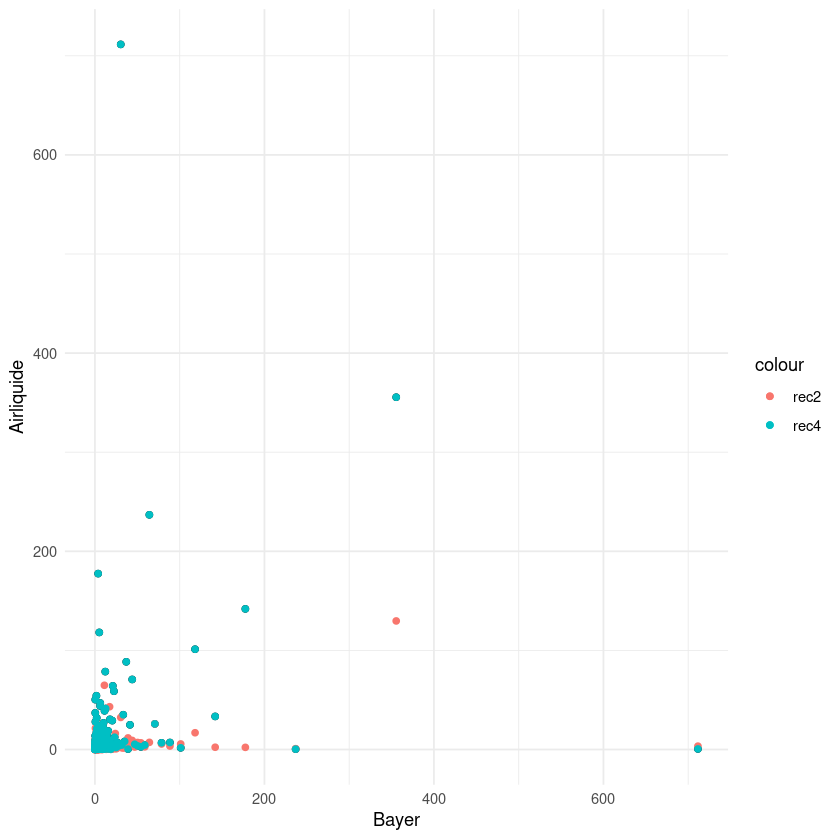

In [46]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = Airliquide)) + 
geom_point() +
geom_point(aes(x = Bayer, y = Airliquide, color = "rec2"), data = rec2) +
geom_point(aes(x = Bayer, y = Airliquide, color = "rec4"), data = rec4) +
theme_minimal()

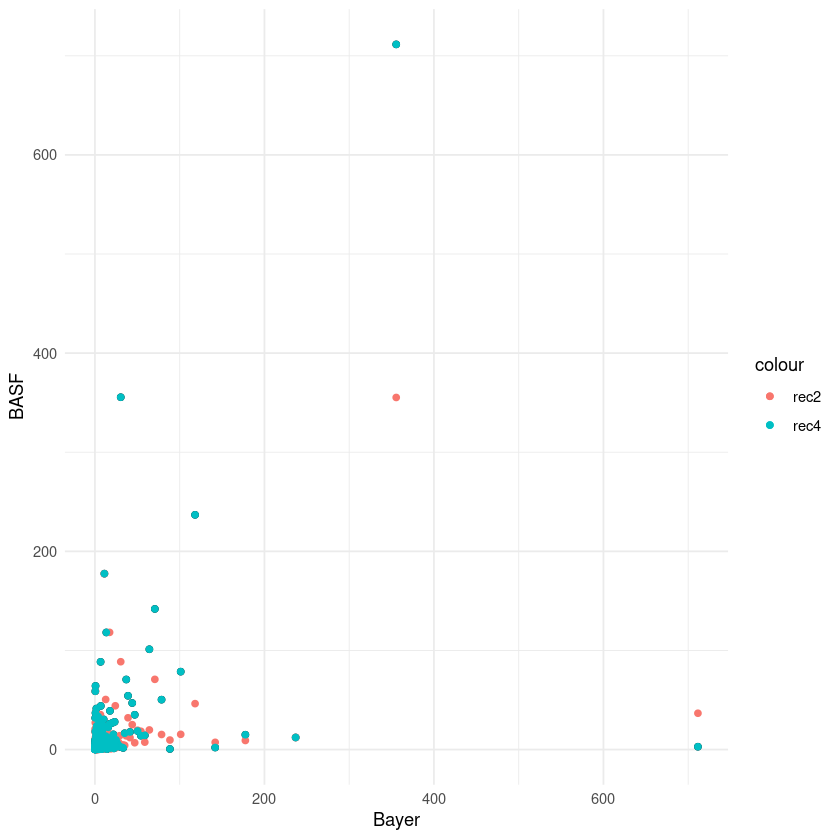

In [47]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = BASF)) + 
geom_point() +
geom_point(aes(x = Bayer, y = BASF, color = "rec2"), data = rec2) +
geom_point(aes(x = Bayer, y = BASF, color = "rec4"), data = rec4) +
theme_minimal()

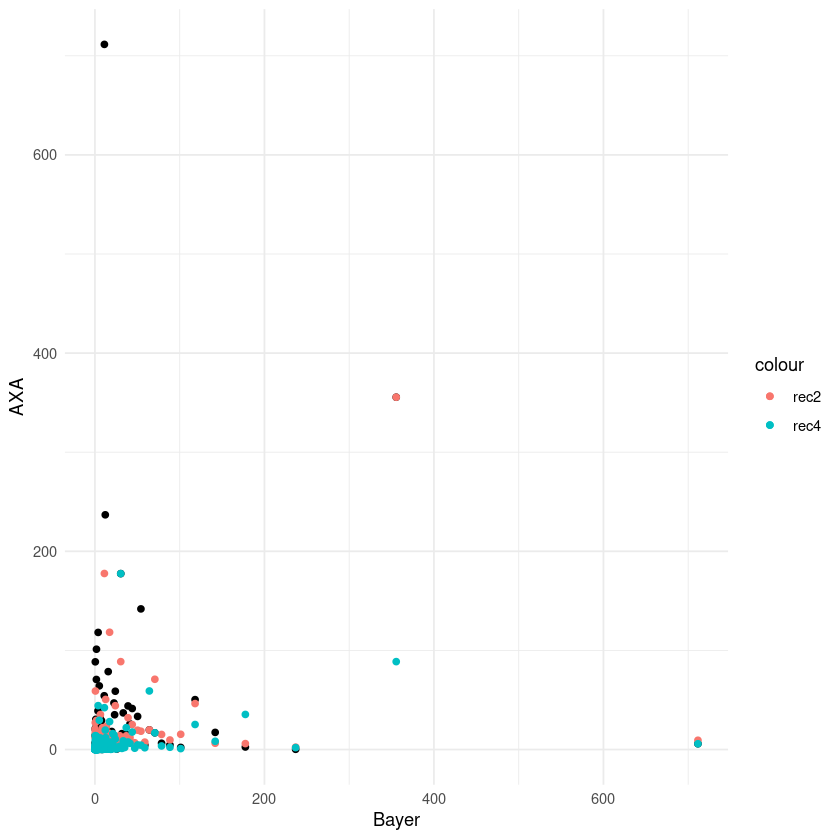

In [48]:
ggplot(log_returns_stocks_trafo, aes(x = Bayer, y = AXA)) + 
geom_point() +
geom_point(aes(x = Bayer, y = AXA, color = "rec2"), data = rec2) +
geom_point(aes(x = Bayer, y = AXA, color = "rec4"), data = rec4) +
theme_minimal()

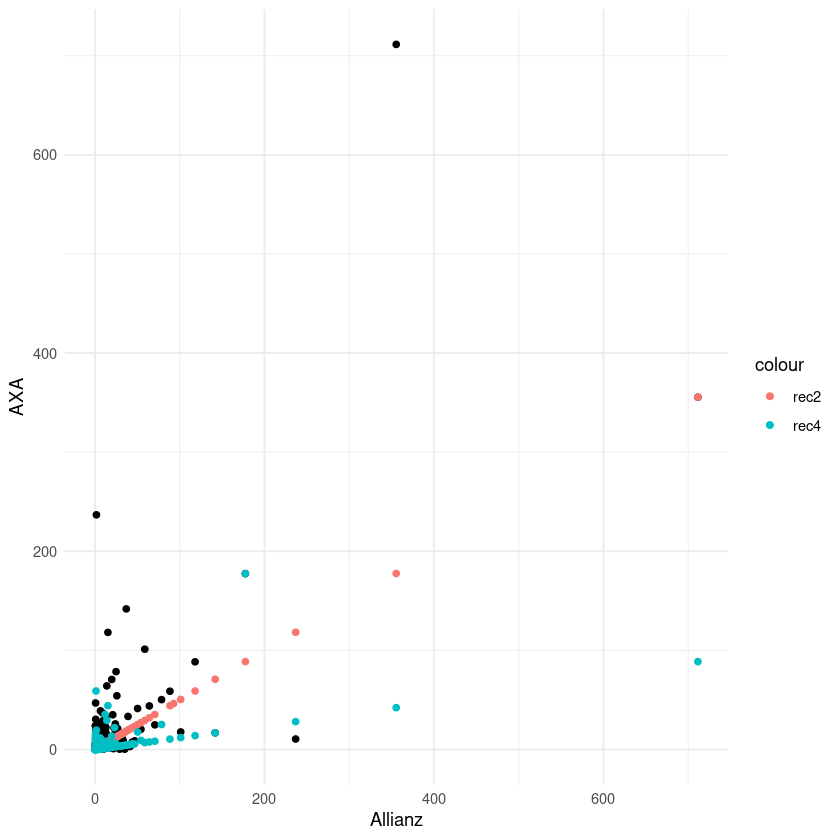

In [49]:
ggplot(log_returns_stocks_trafo, aes(x = Allianz, y = AXA)) + 
geom_point() +
geom_point(aes(x = Allianz, y = AXA, color = "rec2"), data = rec2) +
geom_point(aes(x = Allianz, y = AXA, color = "rec4"), data = rec4) +
theme_minimal()